## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 5 : CIFAR10_Transfer_learning

In [34]:
import tensorflow
from tensorflow import keras
import cv2
import numpy as np
from keras.applications.xception import Xception, preprocess_input
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [35]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print("X_train -> ",X_train.shape)
print("y_train -> ",y_train.shape)
print("X_test  -> ",X_test.shape)
print("y_test  -> ",y_test.shape)

X_train ->  (50000, 32, 32, 3)
y_train ->  (50000, 1)
X_test  ->  (10000, 32, 32, 3)
y_test  ->  (10000, 1)


In [36]:
X_train  =X_train[:10000]
y_train  =y_train[:10000]
X_test   =X_test[:2000]
y_test   =y_test[:2000]
print("X_train -> ",X_train.shape)
print("y_train -> ",y_train.shape)
print("X_test  -> ",X_test.shape)
print("y_test  -> ",y_test.shape)

X_train ->  (10000, 32, 32, 3)
y_train ->  (10000, 1)
X_test  ->  (2000, 32, 32, 3)
y_test  ->  (2000, 1)


In [37]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

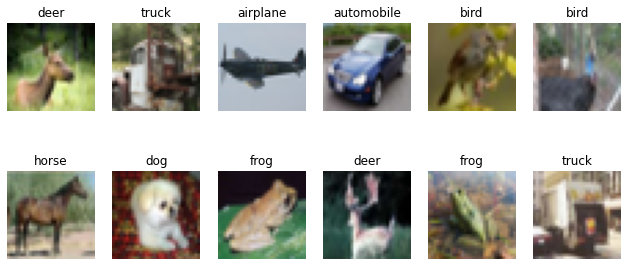

In [40]:
y_train_s = y_train.reshape(-1,)
y_test_s = y_test.reshape(-1,)
cols = 6
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        label =  classes[y_train_s[random_index]]
        ax.set_title(label)
plt.show()

### One hot encoding

In [28]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

MemoryError: Unable to allocate 29.3 GiB for an array with shape (30720000, 256) and data type float32

In [15]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(50000, 10)
(10000, 10)


In [16]:
total_classes = y_train_one_hot.shape[1]
total_classes

10

## Resize for Xception

In [17]:
X_train_ = np.array([cv2.resize(X_train[i], dsize=(72,72), interpolation=cv2.INTER_CUBIC) for i in range(len(X_train))]).astype('float16')
X_test_ = np.array([cv2.resize(X_test[i], dsize=(72,72), interpolation=cv2.INTER_CUBIC) for i in range(len(X_test))]).astype('float16')
print(X_train_.shape)
print(X_test_.shape)

(50000, 72, 72, 3)
(10000, 72, 72, 3)


In [18]:
X_train_ = preprocess_input(X_train_)
X_test_ = preprocess_input(X_test_)
print(X_train_.shape)
print(X_test_.shape)

(50000, 72, 72, 3)
(10000, 72, 72, 3)


In [19]:
model_pretrained = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(72,72,3), pooling=None)

In [20]:
model_pretrained.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [21]:
X_train_ = model_pretrained.predict(X_train_)
X_test_ = model_pretrained.predict(X_test_)
print(X_train_.shape)
print(X_test_.shape)

KeyboardInterrupt: 

## Classifier on top

In [22]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_, y_train_one_hot, validation_data=(X_test_, y_test_one_hot), batch_size=32, epochs=3, verbose=1)

In [ ]:
scores = model.evaluate(x=X_test_, y=y_test_one_hot, verbose=1)
print(model.metrics_names)
print("Test Loss :", scores[0])
print("Baseline Error:", round((100-scores[1]*100),2),'%')